Method 1

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

In [ ]:
# Load the dataset
train_file_path = 'pendigits.tra'
test_file_path = 'pendigits.tes'

# Read the files
train_data = pd.read_csv(train_file_path, header=None)
test_data = pd.read_csv(test_file_path, header=None)

FileNotFoundError: [Errno 2] No such file or directory: 'data/pendigits.tra'

In [ ]:
# Separate features and labels
X_train = train_data.iloc[:, :-1].values
y_train = train_data.iloc[:, -1].values
X_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values

# Split the training data into training and validation subsets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [ ]:
# Build the neural network model
model = Sequential([
    Input(shape=(16,)),  # Explicitly define the input shape
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32,
    verbose=2
)

Epoch 1/30
188/188 - 3s - 14ms/step - accuracy: 0.4435 - loss: 7.1293 - val_accuracy: 0.8125 - val_loss: 0.6372
Epoch 2/30
188/188 - 1s - 5ms/step - accuracy: 0.6616 - loss: 1.1629 - val_accuracy: 0.8866 - val_loss: 0.3692
Epoch 3/30
188/188 - 1s - 5ms/step - accuracy: 0.7683 - loss: 0.7419 - val_accuracy: 0.9186 - val_loss: 0.2399
Epoch 4/30
188/188 - 1s - 5ms/step - accuracy: 0.8255 - loss: 0.5462 - val_accuracy: 0.9380 - val_loss: 0.1841
Epoch 5/30
188/188 - 1s - 5ms/step - accuracy: 0.8575 - loss: 0.4442 - val_accuracy: 0.9586 - val_loss: 0.1398
Epoch 6/30
188/188 - 1s - 5ms/step - accuracy: 0.8801 - loss: 0.3771 - val_accuracy: 0.9606 - val_loss: 0.1208
Epoch 7/30
188/188 - 1s - 5ms/step - accuracy: 0.9043 - loss: 0.3104 - val_accuracy: 0.9633 - val_loss: 0.1097
Epoch 8/30
188/188 - 1s - 5ms/step - accuracy: 0.9148 - loss: 0.2694 - val_accuracy: 0.9720 - val_loss: 0.0890
Epoch 9/30
188/188 - 1s - 5ms/step - accuracy: 0.9269 - loss: 0.2456 - val_accuracy: 0.9753 - val_loss: 0.0769


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Loss: 0.13111728429794312
Test Accuracy: 0.9708404541015625


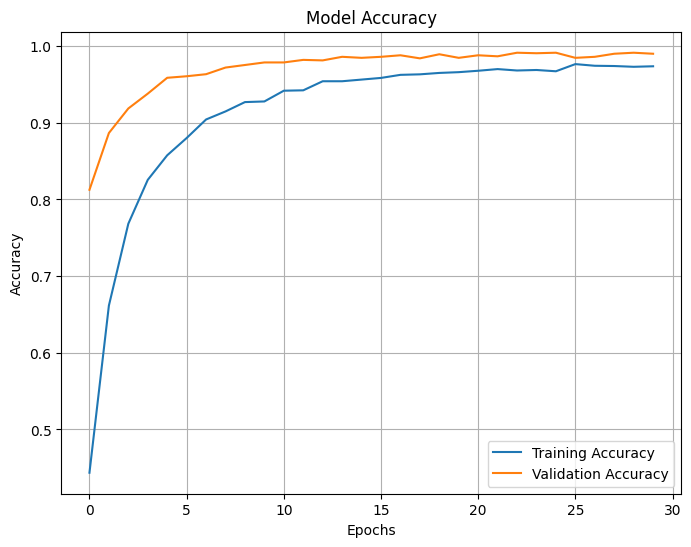

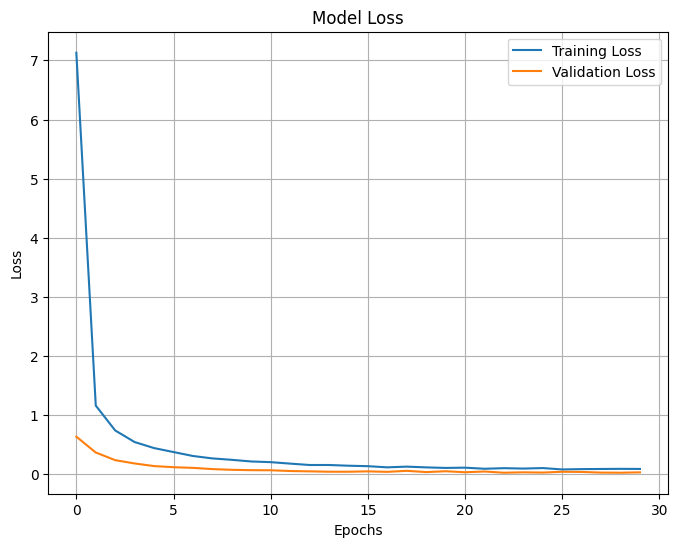

110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


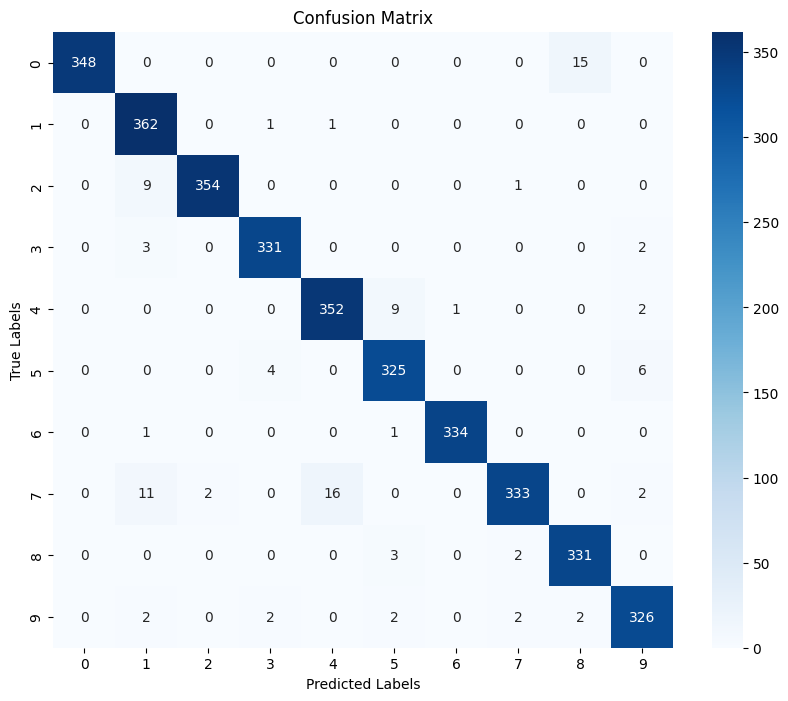

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       363
           1       0.93      0.99      0.96       364
           2       0.99      0.97      0.98       364
           3       0.98      0.99      0.98       336
           4       0.95      0.97      0.96       364
           5       0.96      0.97      0.96       335
           6       1.00      0.99      1.00       336
           7       0.99      0.91      0.95       364
           8       0.95      0.99      0.97       336
           9       0.96      0.97      0.97       336

    accuracy                           0.97      3498
   macro avg       0.97      0.97      0.97      3498
weighted avg       0.97      0.97      0.97      3498



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Plot training and validation accuracy over epochs
def plot_accuracy(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

# Plot training and validation loss over epochs
def plot_loss(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

# Generate a confusion matrix and classification report
def plot_confusion_matrix_and_report(model, X_test, y_test):
    # Predict the test set classes
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)
    
    # Create confusion matrix
    cm = confusion_matrix(y_true_classes, y_pred_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # Print classification report
    print("Classification Report:")
    print(classification_report(y_true_classes, y_pred_classes))

# Call the functions
plot_accuracy(history)
plot_loss(history)
plot_confusion_matrix_and_report(model, X_test, y_test)


Method 2